# TP 2 : Approximation de solution d'équation

Nous revenons dans ce TP sur les principales méthodes itératives de résolution d'une équation de la forme : 
$$ f(x) =0 $$
où $f$ est une fonction définie et continue sur un intervalle $[a,b]$. On se placera dans le cas où, localement, il y a une unique solution pour en donner un algorithme d'approximation. 

Les principales méthodes sont : 
- la méthode de la dichotomie (voir TP1)
- la méthode de Newton (ou Newton-Raphson)
- la méthode du point fixe

----

## 1. Résolution par la méthode de Newton

**Rappel du cours :**
On suppose que la fonction $f$ vérifie les hypothèses suivantes : 

- (h1) $f$ est continue sur $[a,b]$
- (h2) $f$ est strictement monotone sur $[a,b]$
- (h3) $f(a)$ et $f(b)$ sont de signes contraires
- (h4) $f$ est dérivable sur $[a,b]$ et $f'(x) \neq 0 \quad \forall x \in [a,b]$

Les hypothèses (h1), (h2), (h3) garantissent l'existence et l'unicité d'une solution $c$ à l'équation $f(x)=0$. 

Sous les hypothèses (h1), (h2), (h3), (h4) et en ajoutant l'hypothèse 

- (h5) $f$ est deux fois dérivable sur $[a,b]$

On admettra que, pour un $x_0$ suffisamment proche de l'unique solution $c$, la suite de Newton $(x_n)$ définie par :  
$$ x_{n+1} = x_n -\dfrac{f(x_n)}{f'(x_n)} \quad \forall n \geq 1 $$
 converge vers $c$. 


#### **Question 1 :** *une premiere fonction Newton*

Complétez la fonction `newton1` qui retourne les `N` premiers termes de la suite de Newton $(x_n)$ d'une fonction `f` et de sa dérivée `fprime` pour un terme initial `x0` donné : 


In [8]:
def newton1(f,fprime,x0,N):   
    x=x0
    print(f"rang 0 : {x}")
    for i in range(1,N): 
        x = x - f(x)/fprime(x) 
        print(f"rang {i} : {x}")
        

#### **Question 2 :** *un premier exemple*

On considère l'équation $f(x)=0$ où la fonction $f_1$ est définie sur $[0,1]$ par : 

$$f(x)=10x - 9e^{-x}$$

On admettra que la fonction $f$ vérifie les hypothèses (h1) à (h5). 


Créez les deux fonctions `f` et sa dérivée `fprime` puis afficher avec `newton1` les 8 premiers termes de la suite de Newton en partant de la valeur initiale $x_0=0$.

Observez la convergence de la suite $(x_n)$. 

In [10]:
# !pip install numpy
import numpy as np

def f(x):
    return 10*x-9*np.exp(-x)

def fprime(x):
    return 10+9*np.exp(-x)

newton1(f,fprime,0,8)

rang 0 : 0
rang 1 : 0.47368421052631576
rang 2 : 0.5292772678655281
rang 3 : 0.5298329121499656
rang 4 : 0.529832965633434
rang 5 : 0.5298329656334344
rang 6 : 0.5298329656334344
rang 7 : 0.5298329656334344


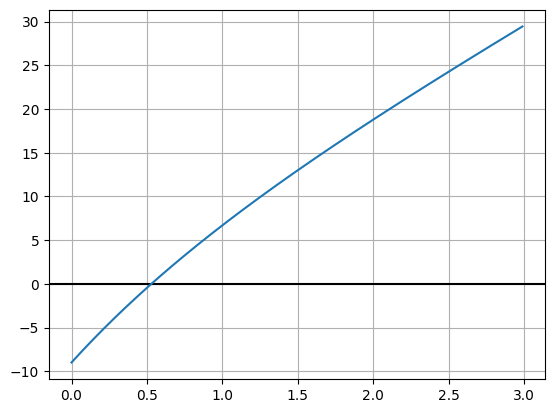

In [12]:
# Complément : tracé de la courbe représentative de la fonction f pour vérifier la racine sur [0,1]
# ---------------------------------------------------------------------------------------------------

#!pip install matplotlib
import matplotlib.pyplot as plt

X = np.arange(0,3,0.01)
Y = f(X)

plt.axhline(y=0,color ="black") # axe des abscisses
plt.grid()
plt.plot(X, Y)

plt.show()

#### **Question 3 :** *Choix de la valeur initiale*

On considère l'équation $h(x)=0$ où la fonction $h$ est définie sur $[1,2]$ par : 

$$h(x)=x^3 -4,53x^2+6,0291x-2,218039$$

$h$ est un polynôme qui vérifie les hypothèses (h1) à (h5). 


Créez les deux fonctions `h` et sa dérivée `hprime` puis affichez avec `newton` les 10 premiers termes de la suite de Newton en partant  :  
-  de la valeur initiale $x_0=1$ 
-  de la valeur initiale $x_0=2$
-  de la valeur initiale $x_0=1,1$
-  de la valeur initiale $x_0=1,15$

Que constate-t-on ? 

In [13]:
# création de la fonction h et de sa dérivée hprime : 
def h(x):
    return x**3-4.53*x**2+6.0291*x-2.218039

def hprime(x):
    return 3*x**2-9.06*x+6.0291

In [14]:
# avec x0=1
newton1(h,hprime,1,10)

# conclusion : la suite converge vers une racine (2,41) mais ce n'est pas la racine recherchée (dans l'intervalle [1,2])

rang 0 : 1
rang 1 : 10.095825242718185
rang 2 : 7.254956640046165
rang 3 : 5.371608539815618
rang 4 : 4.131949563012361
rang 5 : 3.329534273275084
rang 6 : 2.8309072161719278
rang 7 : 2.552105222629322
rang 8 : 2.4350711487389165
rang 9 : 2.4115993875473


In [15]:
# avec x0=2
newton1(h,hprime,2,10)

# conclusion : la suite converge vers une racine (0.609) mais ce n'est pas la racine recherchée (dans l'intervalle [1,2])

rang 0 : 2
rang 1 : -1.078536853685343
rang 2 : -0.2882601286473948
rang 3 : 0.20176766935263007
rang 4 : 0.4741956150722614
rang 5 : 0.5867869058260516
rang 6 : 0.6085336501499943
rang 7 : 0.6093325165773918
rang 8 : 0.6093335800623004
rang 9 : 0.6093335800641841


In [16]:
# avec x0=1,1
newton1(h,hprime,1.1,10)

# conclusion : la suite converge vers une racine (0.609) mais ce n'est pas la racine recherchée (dans l'intervalle [1,2])

rang 0 : 1.1
rang 1 : 1.9591430433365886
rang 2 : 0.6303854689915693
rang 3 : 0.60855288796862
rang 4 : 0.6093325670643164
rang 5 : 0.609333580062475
rang 6 : 0.609333580064184
rang 7 : 0.609333580064184
rang 8 : 0.609333580064184
rang 9 : 0.609333580064184


In [17]:
# avec x0=1,15
newton1(h,hprime,1.15,10)

# conclusion : la suite converge vers la racine recherchée (dans l'intervalle [1,2])

rang 0 : 1.15
rang 1 : 1.7309090909090896
rang 2 : 1.4775674295682106
rang 3 : 1.5100844381847924
rang 4 : 1.5099999999985154
rang 5 : 1.5100000000000011
rang 6 : 1.5099999999999978
rang 7 : 1.509999999999999
rang 8 : 1.51
rang 9 : 1.5099999999999978


Pour comprendre à quoi correspondent les valeurs approchées précédentes, tracez la courbe de la fonction `h` sur l'intervalle [0,4] : 

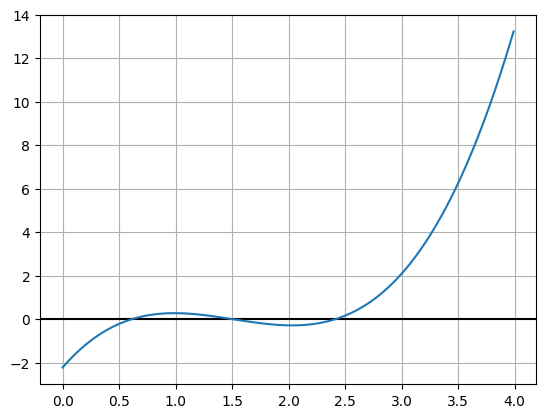

In [76]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0,4,0.01)
Y = h(X)

plt.axhline(y=0,color ="black") # axe des abscisses
plt.grid()
plt.plot(X, Y)

plt.show()


# on lit sur le graphique les 3 racines : 0.6, 1.5 et 2.4

#### **Question 4 :**  *Changement de critère d'arrêt*

Dans la situation où les 5 hypothèses citées précédemment sont satisfaites, puisque nous sommes assurés de la convergence et de la stricte monotonie de la fonction $f$, il est possible de passer en paramètre la marge d'erreur $\epsilon$ (à la place du nombre d'itérations) et de prendre alors comme critère d'arrêt : 

$$ f(x_n + \epsilon) \quad \text{ et } \quad f(x_n - \epsilon)  \quad \text{ de signes contraires} $$

La valeur retournée sera alors une valeur approchée à $\epsilon$ près de la solution. 

A partir de la fonction `newton1`, créez la fonction `newtow2` en tenant compte de ce critère d'arrêt. 
La fonction devra retourner en plus le nombre d'itérations effectuées.


In [18]:
def newton2(f,fprime,x0,e):    # à completer 
    x=x0
    iter=0
    while (f(x+e) * f(x-e) > 0):
        iter += 1
        x = x - f(x)/fprime(x) 
    print (f"itération {iter} : {x}")

Testez cette fonction sur la fonction f de la question 2 à partir de la valeur $x0=0$ et pour $\epsilon = 10^{-4}$

In [19]:
newton2(f,fprime,0,0.0001)

itération 3 : 0.5298329121499656


#### **Question 5 :** *Rapidité de convergence*

Tester la fonction précédente pour la résolution de l'équation 
 $$x^2-10=0 \quad \text{ avec } \quad g(x)= x^2-10 $$
sur l'intervalle $[0,5]$ en partant de $x_0=4$. 
  
La solution positive exacte est connue, $\sqrt{10}$. En comparant avec le résultat de la fonction sqrt(), déterminer combien d'itérations sont nécessaires pour que la valeur approchée retournée par Newton contienne 13 décimales exactes. 



In [20]:
from math import sqrt
def g(x):
    return x**2-10

def gprime(x):
    return 2*x

print('valeur par sqrt: ', sqrt(10))
newton2(g,gprime,4,10**(-13))

# la valeur x_4 contient déjà 13 décimales exactes


valeur par sqrt:  3.1622776601683795
itération 4 : 3.162277660168387


#### **Question 6 :** *Comparaison avec dichotomie*

Reprener le TP1 pour comparer la vitesse de convergence de la méthode de Newton dans la question précédente ($x^2-10=0$) avec la méthode par dichtomie. 

Vous pourrez choisir l'intervalle initial $[a,b]=[3,4]$.

Vous pourrez améliorer la fonction `dichotomie` afin de retourner le nombre d'itérations pour que le milieu $x_n=\dfrac{a_n+b_n}{2}$ soit une valeur approchée de la solution à $\epsilon$ prés.


In [21]:
EPSILON = 10**(-13)

def f(x):
    return x**2-10

def dichotomie(fun, a, b):
    iter=0
    while (b-a) > EPSILON:  
        iter += 1
        m = (a + b) / 2
        if fun(a) * fun(m) > 0:
            a = m  
        else:
            b = m 
    print (f"itération {iter} : {m}")

dichotomie(g, 3, 4)  

# Conclusion : il a fallu 44 itérations pour obtenir une valeur avec 13 décimales exactes -> convergence lente

itération 44 : 3.1622776601683995


#### **Question 7 :** *Méthode de Newton avec dérivation numérique* 

La méthode de Newton nécessite de disposer de la fonction dérivée de $f$, ce qui n'est pas toujours le cas. 

Il faut alors évaluer numériquement une valeur approchée des nombres dérivés $f'(x)$ aux points $x$.  

Soit $f : \mathbb{R} -> \mathbb{R} $ et $a \in \mathbb{R}$. On sait que, lorsque $f$ est dérivable, le nombre dérivée en $a$ est défini par les limites suivantes : 

$$ f'(a)= \lim\limits_{h \to 0} \dfrac{f(a+h)-f(a)}{h} \quad \text{ et } \quad  f'(a)= \lim\limits_{h \to 0} \dfrac{f(a+h)-f(a-h)}{2h}  $$

Ainsi, pour des valeurs de $h$ petites : 

$$ f'(a) \approx \dfrac{f(a+h)-f(a)}{h} \quad \text{ et } \quad  f'(a) \approx \dfrac{f(a+h)-f(a-h)}{2h}  $$

Compléter les fonctions  `derive1` et `derive2` suivantes qui retournent une valeur approchée du nombre dérivée d'une fonction $f$ en un point $a$ à partir des 2 approximations précédentes. 

Vérifier la qualité de ces approximations pour le nombre dérivée de la fonction $f(x)=x^2$ au point $a=7$ avec $h=10^{-i}$ pour $i$ variant de 1 à 16. 

In [22]:
def derive1(f,a,h):
    return  (f(a+h)-f(a))/h

def derive2(f,a,h):
    return  (f(a+h)-f(a-h))/(2*h)

In [24]:
f=lambda x:x**2  # définition d'une fonction sur une ligne
for i in range(1,16):
    print(i)
    print(derive1(f,7,10**(-i)))
    print(derive2(f,7,10**(-i)))

1
14.099999999999966
13.99999999999995
2
14.009999999999678
13.999999999999702
3
14.00100000000748
14.000000000006452
4
14.000099999975646
13.999999999967372
5
14.000009999648453
13.99999999946999
6
14.000001002045792
14.000000003733248
7
14.000000163605364
14.000000057023954
8
13.999999737279722
13.999999737279722
9
14.000001158365194
14.000001158365194
10
14.000036685501982
14.000001158365194
11
13.999823522681254
13.999823522681254
12
14.004797321831575
14.001244608152774
13
14.068746168049984
14.068746168049984
14
13.500311979441904
13.500311979441904
15
14.210854715202002
14.210854715202002


#### **Question 8 :**

A partir de la fonction `newton2(f,fprime,x0,e)` créée précédemment, définir une variante `newton3(f,x0,e,h)` où l'appel à la fonction dérivée est remplacé par un calcul approché avec la fonction `derive2`. 

In [25]:
def newton2(f,fprime,x0,e):    # à completer 
    x=x0
    iter=0
    while (f(x+e) * f(x-e) > 0):
        iter += 1
        x = x - f(x)/fprime(x) 
    print (f"itération {iter} : {x}")
        
def newton3(f,x0,e,h):    # à completer 
    x=x0
    iter=0
    while (f(x+e) * f(x-e) > 0):
        iter += 1
        x = x - f(x)/derive2(f,x,h) 
    print (f"itération {iter} : {x}")    


Testez cette fonction sur le cas de la fonction f de la question 2 : 

In [29]:
f=lambda x:10*x-9*exp(-x)
fprime=lambda x:10+9*exp(-x)

print("résultat avec newton 2 :")
newton2(f,fprime,0,10**(-6))

print("résultat avec newton 3 :")
newton3(f,0,10**(-6),10**(-6))


résultat avec newton 2 :
itération 3 : 0.5298329121499656
résultat avec newton 3 :
itération 3 : 0.529832912149963


#### **Question 9 :**  *Amélioration de la méthode de Newton*


Définir une nouvelle fonction `newton4` en modifiant le critère d'arrêt qui devra être  : deux termes consécutifs sont à une distance inférieure à une certaine constante passée en paramètre.  

$$ \mid x_{n+1} - x_n \mid \leq e $$

où $e$ est un paramètre. 

In [30]:
def newton4(f,fprime,x0,epsilon):
    x = x0
    y = x0-f(x0)/fprime(x0)
    iter = 1
    while abs(x-y)> epsilon:
        iter += 1
        x = y
        y = x - f(x)/fprime(x)
    print(f"itération {iter} : {y}")
    

In [31]:
newton4(f,fprime,0,10**(-6))

itération 4 : 0.529832965633434


Dans le cas où la convergence de la suite n'est pas assurée, cette dernière version pouvant facilement aboutir à une boucle infinie, modifiez cette version en limitant le nombre d'itération par un nombre maximal d'itération passé en paramètre. La fonction devra retourner le nombre d'itérations effectuées.

In [32]:
def newton4(f,fprime,x0,epsilon):
    x = x0
    y = x0-f(x0)/fprime(x0)
    iter = 1
    while (abs(x-y)> epsilon) and (iter < imax):
        iter += 1
        x = y
        y = x - f(x)/fprime(x)
    print(f"itération {iter} : {y}")
